# ISTANBUL RAIL SYSTEM PASSENGER DATA VISUALIZATION USING GMAPS

#### Author: Ediz Anıl Özkaya

http://edizozkaya.com

LinkedIn: https://www.linkedin.com/in/ediz-anıl-özkaya-863bb6161

GitHub: https://github.com/EdizAnil

# Introduction
In this notebook, we will create a weighted heatmap of passenger counts for each Rail System Station in Istanbul Turkey with gmaps library to visualize the passenger density. Gmaps library enables us to plot data on maps using different techniques to create meaningful visualizations.

## Library Imports

In [1]:
# We import numpy and pandas for data manupilation
import numpy as np
import pandas as pd

#Matplotlib and seaborn for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#We will import some other libraries down below in visualization section.


## Dataset
The dataset is downloaded from IBB OPEN DATA PORTAL (Istanbul Metropolitian Municipality) and is open to public. The data is updated annually and it has dictionary for each column in both English and Turkish which is accessible from the given link below.
The dataset includes the monthly passage and passenger counts for each rail system station in Istanbul including metro lines, tram lines, etc. 

First, we read the csv file downloaded from https://data.ibb.gov.tr/en/dataset/rayli-sistemler-istasyon-bazli-yolcu-ve-yolculuk-sayilari.

In [2]:
df = pd.read_csv("Rail Systems Station Based Passenger and Journey Numbers.csv")

In [3]:
df

,_id,PASSAGE_COUNT,PASSENGER_COUNT,transaction_Month,transaction_Year,LINE,STATION_NAME,STATION_NUMBER,TOWN,LATITUDE,LONGITUDE
0,1,453528,156555,1,2019,AKSARAY-HAVALİMANI,BAGCILAR MEYDAN,BGM-BGM,Bağcılar,41.034500,28.856583
1,2,278544,127450,1,2019,AKSARAY-HAVALİMANI,BAHCELIEVLER,BAH-BAH,Bahçelievler,40.995667,28.863556
2,3,282941,136184,1,2019,AKSARAY-HAVALİMANI,BAKIRKOY,BKK-BKK,Bakırköy,40.996583,28.874417
3,4,146589,56965,1,2019,AKSARAY-HAVALİMANI,IDTM,DTM-DTM,Bakırköy,40.986556,28.828417
4,5,982793,397500,1,2019,AKSARAY-HAVALİMANI,KARTALTEPE,KRP-KRP,Bayrampaşa,41.048500,28.895778
...,...,...,...,...,...,...,...,...,...,...,...
5859,5860,47856,21777,12,2020,TAKSİM-KABATAŞ FUNİKULERİ,KABATAS,KTS-TKS,Beyoğlu,41.034056,28.992028
5860,5861,35136,17505,12,2020,TAKSİM-KABATAŞ FUNİKULERİ,TAKSIM,TAK-KBT,Beyoğlu,41.036750,28.986444
5861,5862,146791,40586,12,2020,ÜSKÜDAR ÇEKMEKÖY METROSU,Bulgurlu,BLG-BLG,Üsküdar,41.016583,29.075444
5862,5863,67563,23072,12,2020,ÜSKÜDAR ÇEKMEKÖY METROSU,IHLAMUR KUYU,IKI-IKI,Ümraniye,41.019694,29.130694


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5864 entries, 0 to 5863
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   _id                5864 non-null   int64  
 1   PASSAGE_COUNT      5864 non-null   int64  
 2   PASSENGER_COUNT    5864 non-null   int64  
 3   transaction_Month  5864 non-null   int64  
 4   transaction_Year   5864 non-null   int64  
 5   LINE               5864 non-null   object 
 6   STATION_NAME       5819 non-null   object 
 7   STATION_NUMBER     5819 non-null   object 
 8   TOWN               5780 non-null   object 
 9   LATITUDE           5703 non-null   float64
 10  LONGITUDE          5703 non-null   float64
dtypes: float64(2), int64(5), object(4)
memory usage: 504.1+ KB


As we can see above, the dataset has 5864 entries and have some missing values.

## Data Manipulation
In this section we will clean the data, get rid of the missing values and try to adapt the data for our goal.

In [5]:
df.isnull().sum()

_id                    0
PASSAGE_COUNT          0
PASSENGER_COUNT        0
transaction_Month      0
transaction_Year       0
LINE                   0
STATION_NAME          45
STATION_NUMBER        45
TOWN                  84
LATITUDE             161
LONGITUDE            161
dtype: int64

We have to have latitude and longitude columns in order to visualize the data on a map and we can not interpret it by getting the mean of other entries. Lets get rid of the missing values for LATITUDE column and see if it is enough to get rid of every missing value.

In [6]:
df.dropna(subset=["LATITUDE"]).isnull().sum()

_id                  0
PASSAGE_COUNT        0
PASSENGER_COUNT      0
transaction_Month    0
transaction_Year     0
LINE                 0
STATION_NAME         0
STATION_NUMBER       0
TOWN                 0
LATITUDE             0
LONGITUDE            0
dtype: int64

Positive! 
Dropping the missing values on "LATITUDE" column solves our problem and gets rid of every single missing value. Now we can apply it safely.

In [7]:
df = df.dropna(subset=["LATITUDE"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5703 entries, 0 to 5862
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   _id                5703 non-null   int64  
 1   PASSAGE_COUNT      5703 non-null   int64  
 2   PASSENGER_COUNT    5703 non-null   int64  
 3   transaction_Month  5703 non-null   int64  
 4   transaction_Year   5703 non-null   int64  
 5   LINE               5703 non-null   object 
 6   STATION_NAME       5703 non-null   object 
 7   STATION_NUMBER     5703 non-null   object 
 8   TOWN               5703 non-null   object 
 9   LATITUDE           5703 non-null   float64
 10  LONGITUDE          5703 non-null   float64
dtypes: float64(2), int64(5), object(4)
memory usage: 534.7+ KB


For our purpose we are going to get the sum of the passenger counts all year arond for each station. As one specific latitude and longitude corresponds to a single station we dont need to consider the STATION_NAME or STATION_NUMBER column as we are only going to plot the density on the map without station names. 

In [9]:
df = df.groupby(["LATITUDE","LONGITUDE"]).agg({"PASSENGER_COUNT": sum})

In [10]:
df.head()

,,PASSENGER_COUNT
LATITUDE,LONGITUDE,
40.783806,29.411556,1606964
40.784139,29.409500,284876
40.792333,29.391806,199346
40.799333,29.379972,595661
40.808556,29.363944,473093


This is an multi index dataframe. However we do not need multi indexing for our purpose and it can make our job a little more complex when we try to use gmaps. So we can basically use reset_index() to get single level indexing.

In [11]:
df = df.reset_index()

In [12]:
df.head()

,LATITUDE,LONGITUDE,PASSENGER_COUNT
0,40.783806,29.411556,1606964
1,40.784139,29.409500,284876
2,40.792333,29.391806,199346
3,40.799333,29.379972,595661
4,40.808556,29.363944,473093


## Visualization

Lets see if we are good to go and plot the passenger counts using seaborn library without a map. We can visualize the data using scatterplot and setting the size as passenger counts. You can learn more about seaborn from: https://seaborn.pydata.org/index.html

<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

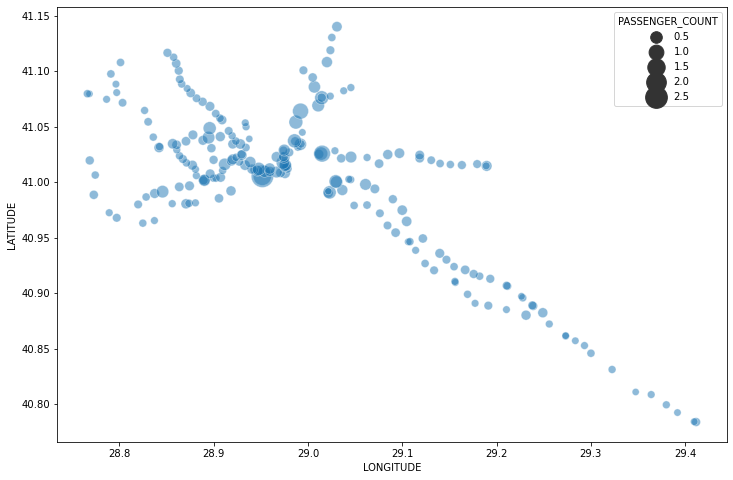

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='LONGITUDE',y='LATITUDE',data=df,
                sizes=(50, 500), size="PASSENGER_COUNT",alpha=.5)

So far, so good. We visualized the data using seaborn without a map. Now, lets use gmaps library to create a weigthed heatmap on an actual map.

#### Gmaps
This is the second part of the visualization section. First, we need to import the gmaps library and configure it with our own API Key from https://console.cloud.google.com/home 

In [14]:
import gmaps

In [15]:
gmaps.configure(api_key="###") 

In [16]:
locations = df[["LATITUDE","LONGITUDE"]]
weights = df["PASSENGER_COUNT"]

In [17]:
weights

0      1606964
1       284876
2       199346
3       595661
4       473093
        ...   
207     804650
208    1578561
209    1393639
210     892645
211    3260227
Name: PASSENGER_COUNT, Length: 212, dtype: int64

In [18]:
# The center of the map
center_coordinates = (41.036841, 29.016209)

In [19]:
figure_layout = {
    'width': '100%',
    'height': '75vh',
    'border': '2px solid white',
    'padding': '2px'
}

In [20]:
fig = gmaps.figure(center=center_coordinates, 
                   zoom_level=10, 
                   map_type='HYBRID', 
                   layout=figure_layout)

fig.add_layer(gmaps.heatmap_layer(locations, 
                                  weights=weights, 
                                  point_radius=20,
                                  max_intensity=5000000))
fig

Figure(layout=FigureLayout(border='2px solid white', height='75vh', padding='2px', width='100%'))

#### Exporting the map as html

In [21]:
from ipywidgets.embed import embed_minimal_html

In [22]:
embed_minimal_html('export.html', views=[fig])
